# Data Analysis Project: Asian Recipes (the Woks of Life)

In America, **Asian Food** is often thought of as simply takeout, limited to dishes like Beef with Broccoli and General Tso's Chicken. Of course, these are an integral part to the history of Chinese-Americans in the US, but there are thousands of delicious recipes out there from every culture, from Japanese to Korean to Thai. In this ML Project, I attempt to highlight the diversity of these dishes and discover correlations between ingredients, reviews, preparation time, and calorie count.

All data is scraped from thewoksoflife.com using a custom-built recipe scraper located in the same repository as this Jupyter Notebook. This dataset is roughly scraped, with many missing values and duplicates. The original dataset consists of 1450 recipes with 9 features, including Name, Prep Time, Cook Time, Total Time, Ingredients, Calories, Average Rating, Review Count, and URL.

## Data

This CSV file contains 1450 recipes with 9 features, listed as follows:

- Average Rating    **(float64)**
- Calories          **(object)**
- Category          **(object)**
- Cook Time         **(object)**
- Ingredients       **(object)**
- Name              **(object)**
- Prep Time         **(object)**
- Review Count      **(float64)**
- Total Time        **(object)**
- URL               **(object)**

In [1]:
import pandas as pd

data = pd.read_csv("Recipes.csv")
data

,Average Rating,Calories,Category,Cook Time,Ingredients,Name,Prep Time,Review Count,Total Time,URL
0,4.80,294 kcal,Soups,PT165M,"15 grams dried seaweed ((haidai, 海带, also know...",Cantonese Chicken Feet Soup,PT60M,5.0,PT225M,https://thewoksoflife.com/cantonese-chicken-fe...
1,4.80,346 kcal,Chicken,PT40M,3 pounds whole chicken wings ((about 14 wings)...,Baked White Pepper Chicken Wings,PT30M,10.0,PT70M,https://thewoksoflife.com/baked-white-pepper-c...
2,4.84,306 kcal,Noodles and Pasta,PT10M,"8 oz. boneless skinless chicken thighs ((225g,...",Restaurant-Style Chicken Lo Mein,PT20M,25.0,PT30M,https://thewoksoflife.com/chicken-lo-mein/
3,5.00,206 kcal,Chicken,PT20M,"3 scallions ((cut into 2-inch long pieces, wi...",Ginger Chicken,PT10M,6.0,PT30M,https://thewoksoflife.com/ginger-chicken/
4,4.87,293 kcal,Chicken and Poultry,PT5M,"2 chicken breasts ((about 12 ounces/340g, cut...",Chicken with Black Bean Sauce,PT35M,15.0,PT40M,https://thewoksoflife.com/chicken-black-beans/
...,...,...,...,...,...,...,...,...,...,...
1447,5.00,327 kcal,Vegetables,PT10M,"1 package mung bean vermicelli', '½ of a smal...",Cabbage and Glass Noodles,PT10M,3.0,PT20M,https://thewoksoflife.com/cabbage-and-glass-no...
1448,4.00,554 kcal,Chicken and Poultry,PT45M,6 boneless chicken thighs ((skin on and fat t...,Roasted Chicken with Sticky Rice,PT120M,3.0,PT165M,https://thewoksoflife.com/chicken-with-sticky-...
1449,4.84,NaN,Noodles and Pasta,PT15M,1-3 fresh or dried red chilis ((sliced thinly...,KAITLIN’S SPECIAL NOODLES,PT20M,6.0,PT35M,https://thewoksoflife.com/kaitlins-special-noo...
1450,5.00,391 kcal,Rice,PT15M,"3 cups cooked rice', 'vegetable oil', '2 eggs...",Chinese Banquet Fried Rice,PT10M,1.0,PT25M,https://thewoksoflife.com/banquet-fried-rice/


## Data Cleaning
As you may see, this file needs a lot of cleaning. We need to rearrange the columns in a sensible way, clean the ingredients section, convert the time into minutes, drop duplicates, and deal with missing values.

In [3]:
"""
It looks like we have a number of issues: there seem to be double parenthesis, single parenthesis, numbers, fractions, 
periods,dashes, slashes, and apostrophes. 

Our goal is to visualize the ingredients used and discover trends: numbers & measurements interfere with that, so we will
remove them. The strings_to_remove list contains regex strings representing the above strings.
We simply want a string containing ingredients separated by a comma.

"""
# Rearranging Columns
data = data[['Name', 'Category', 'Prep Time', 'Cook Time', 'Total Time', 'Ingredients', 'Calories', 'Average Rating', 
             'Review Count', 'URL']]

# define a function to remove unneeded strings from rows in dataframe
def remove_string(df, col_name, string_to_remove):
    df[col_name] = df[col_name].str.replace(string_to_remove, '')
    
strings_to_remove = [r"\(([^()]*\))", r"\([^()]*\)", '\d+', r'\d+\/\d+', '.', '-', '/', "'"] 
for num_strings in range(len(strings_to_remove)):
    remove_string(data, 'Ingredients', strings_to_remove[num_strings])

chars_to_remove = ['P', 'T', 'M', 'kcal'] # remove these characters from cooking times / calories
for num_chars in range(len(chars_to_remove)):
    remove_string(data, 'Prep Time', chars_to_remove[num_chars])
    remove_string(data, 'Cook Time', chars_to_remove[num_chars])
    remove_string(data, 'Total Time', chars_to_remove[num_chars])
    remove_string(data, 'Calories', chars_to_remove[num_chars])
    
# Remove measurements from ingredients column
remove_measurements = ['gram', 'grams', 'cup', 'cups', 'teaspoon', 'teaspoons', 'tablespoon', 'tablespoons', 'oz', 
                       'slices', 'slice', 'pound', 'pounds', 'sheets', 'sheet', 'cloves', 'packages', 'ounce', 'ounces', 
                       'handful of', 'chopped']

remove_words = r'\b(?:{})\b'.format('|'.join(remove_measurements))
data['Ingredients'] = data['Ingredients'].str.replace(remove_words, '')   # Remove measurement words
data['Ingredients'] = data['Ingredients'].str.lower()                     # Standardize ingredient names by lowercasing everything

display(data)

,Name,Category,Prep Time,Cook Time,Total Time,Ingredients,Calories,Average Rating,Review Count,URL
0,Cantonese Chicken Feet Soup,Soups,60,165,225,"dried seaweed , raw shelled peanuts , c...",294,4.80,5.0,https://thewoksoflife.com/cantonese-chicken-fe...
1,Baked White Pepper Chicken Wings,Chicken,30,40,70,"whole chicken wings , white pepper powder ...",346,4.80,10.0,https://thewoksoflife.com/baked-white-pepper-c...
2,Restaurant-Style Chicken Lo Mein,Noodles and Pasta,20,10,30,"boneless skinless chicken thighs , cornsta...",306,4.84,25.0,https://thewoksoflife.com/chicken-lo-mein/
3,Ginger Chicken,Chicken,10,20,30,"scallions , garlic , ginger , vegetabl...",206,5.00,6.0,https://thewoksoflife.com/ginger-chicken/
4,Chicken with Black Bean Sauce,Chicken and Poultry,35,5,40,"chicken breasts , water, cornstarch, o...",293,4.87,15.0,https://thewoksoflife.com/chicken-black-beans/
...,...,...,...,...,...,...,...,...,...,...
1447,Cabbage and Glass Noodles,Vegetables,10,10,20,"package mung bean vermicelli, ½ of a small h...",327,5.00,3.0,https://thewoksoflife.com/cabbage-and-glass-no...
1448,Roasted Chicken with Sticky Rice,Chicken and Poultry,120,45,165,"boneless chicken thighs , large shallot , ...",554,4.00,3.0,https://thewoksoflife.com/chicken-with-sticky-...
1449,KAITLIN’S SPECIAL NOODLES,Noodles and Pasta,20,15,35,"fresh or dried red chilis , ½ sichuan peppe...",NaN,4.84,6.0,https://thewoksoflife.com/kaitlins-special-noo...
1450,Chinese Banquet Fried Rice,Rice,10,15,25,"cooked rice, vegetable oil, eggs , carro...",391,5.00,1.0,https://thewoksoflife.com/banquet-fried-rice/


In [4]:
# Drop Duplicate Recipes
orig_rows = data.shape[0]
data = data.drop_duplicates()
new_rows = data.shape[0]
print("Number of duplicate rows: ", abs(new_rows - orig_rows))

Number of duplicate rows:  620


In [5]:
# The format of the ingredients looks wacky, let's take a full look at them!
# pd.set_option('display.max_colwidth', -1)
# display(data)

In [6]:
# We should also make sure our categories are grouped together well
display(data.Category.unique())

array(['Soups', 'Chicken', 'Noodles and Pasta', 'Chicken and Poultry',
       'Main Course', 'Appetizers', "Chicken &amp;amp', 'Poultry",
       "Chicken &amp;amp', 'Holiday', 'Poultry", 'Salad', 'Noodles',
       'Holiday Recipes', 'Appetizers and Snacks', 'Chicken ad poultry',
       'Soups and Stocks', 'Salads', 'Vegetables', 'Noodle Soup', 'Rice',
       'Chinese takeout', 'Sandwiches', 'Bread and Pizza',
       "Chicken', 'Rice", nan, 'Tofu', 'Appetizer', 'Beef',
       'Beef recipes', 'Soup', 'Fish &amp; Seafood', 'Shrimp', 'Dim Sum',
       'Seafood', "Fish &amp;amp', 'Seafood", "Noodles', 'Rice &amp;amp",
       'Dumplings', 'Fish and Seafood', "Fish &amp; Seafood', 'Rice",
       'Condiments', 'Fish', 'Pork', 'Chinese New Year',
       'Fish anbs Seafood', 'Eggs', "Fish and Seafood', 'Pork', 'Tofu",
       "Main Course', 'Pork", 'Sandwich', 'Pasta', 'Bread',
       "Easy', 'Quick &amp;amp", "Soups &amp;amp', 'Stocks",
       "Pork', 'Ribs", 'Breakfast', 'Dessert and Sweet Stuf

In [7]:
# Since it looks like a lot of categories aren't properly labeled, we should use a map to group them together.
replace_map = {'Noodles and Pasta': 'Noodles', 'Chicken': 'Poultry', 'Chicken and Poultry': 'Poultry', 
               'Chicken &amp;amp': 'Chicken', 'Appetizers and Snacks': 'Appetizers', 'Chicken ad poultry': 'Poultry', 
              'Soups and Stocks': 'Soup', 'Salads': 'Vegetarian', 'Vegetables': 'Vegetarian', 'Noodle Soup': 'Soup', 
              'Bread and Pizza': 'Bread', 'Beef recipes': 'Beef', 'Fish and Seafood': 'Seafood','Fish': 'Seafood',
              'Fish anbs Seafood': 'Seafood', 'Shrimp': 'Seafood', 'Tofu': 'Vegetarian', 'Pasta': 'Noodles',
              'Easy': 'Quick and Easy','Soups &amp;amp': 'Soup', 'Dessert and Sweet Stuff': 'Desserts', 
               'Vegetable': 'Vegetarian', 'Noodles ad Pasta': 'Noodles', 'appetizers and dumplings': 'Appetizers', 
               'Appetizer': 'Appetizers', 'Pizza': 'Bread', 'Bread and Pizzaq': 'Bread',
              'Desserts &amp; Sweet stuff': 'Dessert', 'Breakfast and Brunch': 'Breakfast', 'desserts': 'Dessert', 
              'desserts and Sweet Stuff': 'Dessert', 'Dessert and Sweet Stuff': 'Dessert', ' Salad': 'Vegetarian', 
              'Vegetabkles': 'Vegetarian', 'Noodles and Pasa': 'Noodles', "Fish &amp;amp', 'Seafood": 'Seafood', 
               'Rice &amp;amp': 'Rice', "Fish &amp; Seafood', 'Rice": 'Rice', 
               "Fish and Seafood', 'Pork', 'Tofu": "Seafood", "Main Course', 'Pork": 'Pork', 
               "Easy', 'Quick &amp;amp": 'Quick and Easy', "Soups &amp;amp', 'Stocks": "Soup", "Pork', 'Ribs": "Pork", 
              "Chinese bakery": "Bread",", 'Salad": "Vegetarian", "Vegetables', 'Vegetarian": "Vegetarian", 
               "Chicken &amp;amp', 'Holiday', 'Poultry": "Poultry", "Chicken &amp;amp', 'Poultry": "Poultry", 
               "Chicken', 'Rice": "Rice", "Salad": "Vegetarian", "Noodles', 'Rice &amp;amp": "Noodles", 
              "Breakfast', 'Desserts &amp; Sweet stuff": "Dessert", "Breakfast', 'Brunch', 'Dessert": "Dessert",
              "Breakfast and Brunch', 'Dessert and Sweet Stuff": "Dessert", "Egg": "Eggs", "Soups": 'Soup',
              "Appetizer', 'Vegetables": "Vegetarian", "Appetizers', 'Soup": "Soup", "Baking": "Bread", 
              "Bread &amp;amp', 'Pizza": "Bread", "Fish &amp; Seafood": "Seafood", "Appetizer', 'Salad": "Vegetarian", 
              "Salad', 'Vegetables": "Vegetarian", "Sandwich": "Bread", "Sandwiches": "Bread", "Vegan": "Vegetarian"}

data['Category'] = data['Category'].map(replace_map).fillna(data['Category'])
display(data)


,Name,Category,Prep Time,Cook Time,Total Time,Ingredients,Calories,Average Rating,Review Count,URL
0,Cantonese Chicken Feet Soup,Soup,60,165,225,"dried seaweed , raw shelled peanuts , c...",294,4.80,5.0,https://thewoksoflife.com/cantonese-chicken-fe...
1,Baked White Pepper Chicken Wings,Poultry,30,40,70,"whole chicken wings , white pepper powder ...",346,4.80,10.0,https://thewoksoflife.com/baked-white-pepper-c...
2,Restaurant-Style Chicken Lo Mein,Noodles,20,10,30,"boneless skinless chicken thighs , cornsta...",306,4.84,25.0,https://thewoksoflife.com/chicken-lo-mein/
3,Ginger Chicken,Poultry,10,20,30,"scallions , garlic , ginger , vegetabl...",206,5.00,6.0,https://thewoksoflife.com/ginger-chicken/
4,Chicken with Black Bean Sauce,Poultry,35,5,40,"chicken breasts , water, cornstarch, o...",293,4.87,15.0,https://thewoksoflife.com/chicken-black-beans/
...,...,...,...,...,...,...,...,...,...,...
1425,Beijing “Fried Sauce” Noodles – Zha Jiang Mian,Noodles,15,25,40,"ground pork , ¼ salt, cornstarch, ½ oil ...",446,4.73,11.0,https://thewoksoflife.com/beijing-fried-sauce-...
1429,Cantonese Chicken & Salted Fish Fried Rice,Rice,20,10,30,"oil, chicken breast , ½ medium onion , ...",NaN,4.84,6.0,https://thewoksoflife.com/cantonese-chicken-sa...
1440,Easy Mushroom Noodle Stir fry,Noodles,60,10,70,"dried shiitake mushrooms, ¼ onions or scal...",760,NaN,NaN,https://thewoksoflife.com/mushroom-noodles/
1449,KAITLIN’S SPECIAL NOODLES,Noodles,20,15,35,"fresh or dried red chilis , ½ sichuan peppe...",NaN,4.84,6.0,https://thewoksoflife.com/kaitlins-special-noo...


In [8]:
# Let's make sure everything is fine
li = data.groupby(['Category']).size() .reset_index(name='counts')
li

,Category,counts
0,Appetizers,58
1,Beef,54
2,Beverages,1
3,Bread,47
4,Breakfast,9
5,Chinese,1
6,Chinese New Year,2
7,Chinese takeout,1
8,Condiments,6
9,Dessert,77


In [9]:
# Columns look fine for the most part, but there are a couple of columns that are sparse in count. This won't be relevant
# for our visualization later, so let's drop everything under 15.

counts = data['Category'].value_counts()
data = data[data.isin(counts.index[counts >= 15]).values]
new_li = data.groupby(['Category']).size().reset_index(name='counts').sort_values(['counts'], ascending=True)
new_li

,Category,counts
7,Rice,41
9,Soup,46
2,Bread,47
1,Beef,54
0,Appetizers,58
8,Seafood,58
5,Pork,70
3,Dessert,77
4,Noodles,89
6,Poultry,102


## Exploratory Data Analysis
Let's evaluate the data and try to discover any possible trends!

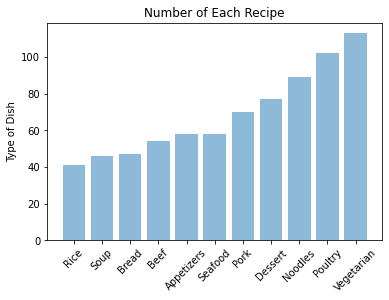

In [10]:
import matplotlib.pyplot as plt
import numpy as np

names = list(new_li['Category'])
counts = list(new_li['counts'])
y_pos = np.arange(len(counts))


plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, names, rotation=45)
plt.ylabel('Type of Dish')
plt.title('Number of Each Recipe')

plt.show()


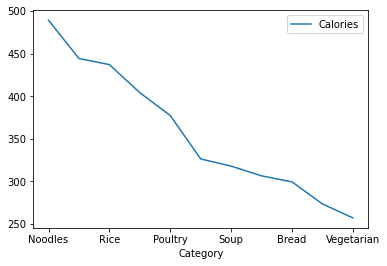

In [11]:
# We didn't drop null values earlier on since most values are filled and completion of a row is not critical to visualization.
# Here, we'll drop any rows with a "NA" number of calories are compare which type of food has the most calories on average.

data["Calories"] = pd.to_numeric(data["Calories"])
calories = data.dropna(subset = ['Calories'])
calories.groupby('Category').Calories.mean().sort_values(ascending=False).plot(legend=True)


In [12]:
average_ratings = calories.groupby('Category')['Average Rating'].mean().sort_values(ascending=False)
average_ratings

Category
Seafood       4.916000
Soup          4.892564
Vegetarian    4.885227
Beef          4.871957
Rice          4.843000
Poultry       4.836207
Pork          4.836034
Bread         4.821250
Noodles       4.819079
Dessert       4.808958
Appetizers    4.807660
Name: Average Rating, dtype: float64

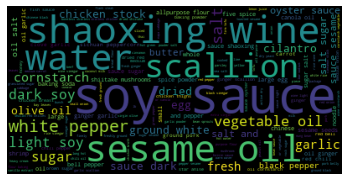

In [13]:
from wordcloud import WordCloud 
wordcloud = WordCloud().generate(' '.join(data['Ingredients']))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Summary

In this notebook, I've cleaned the recipe dataset, removing extraneous numbers, misnamed categories, etc. I've also did some basic exploratory data analysis and developed several graphs showcasing factors like average rating per categor, most popular ingredients, calories per category, etc. In the future, when more ideas for analysis come to mind, I will be developing more graphs in order to better capture the spirit of the data. In the meantime, I thank you for reading this notebook, and if you're interested in how I built the collaborative filtering based recommender system, I direct you to my other notebook, "Recipe_Recommender_System.ipynb"!